## Modeling the motion of a charge in a magnetic field

In this problem, you will develop the essential computational physics to model the motion of a charged particle in a magnetic field. The force acting on such a particle is,

$$\mathbf{F} = q \mathbf{v} \times \mathbf{B}$$

The code below sets up all the parameters and initial conditions that you need and provides the loop structure needed to model the motion. The essential physics that you need to provide will do the following:

1. Compute the magnetic force
2. Update the velocity by simple numerical integration (Euler step)
3. Update the position by simple numerical integration (Euler step)

After you complete the numerical integration, we ask you to plot the motion in 3 dimensions. You might have to look up how to do that online.

Once your code is working for the case of a positive charge with no initial velicty in the direction of the magnetic field, this problem asks you to:
1. use the code to model the motion of the positive charge with an initial velocity that includes a component in the direction of the magnetic field, and
2. use the code to model the motion of a negative charge also with an initial velocity that includes a component in the direction of the magnetic field.

### Import necessary libraries and setup plots

Below, we call the Python numerical library (```numpy```) and the 3D plotting module.  We also make sure plots occur inline and we set the size of the plots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rc("figure", figsize=(8,8))
import time

### Setup constants, parameters, and initialize vectors

Below, we define the mass and charge of the positive particle, which we define in SI units. We also give the initial speed of the particle and the strength of the magnetic field in SI units. We also set up the array that keeps track of the time, and initialize arrays that keep track of the position and velocity vectors (careful here! these arrays have 3 components per element).

In [3]:
mp = 1.67E-27        # mass of proton: kg
qe = 1.602E-19       # charge of proton: C

v0 = 1e3             # speed of the proton: m/s
B0 = 1.0E-4          # strength of the magnetic field: T

## Setup the timing
dt = 1.0E-7          # time step: s
t = np.arange(0.0, 0.005, dt) # array of time

## Initialize position and veloicty arrays to be zero
rp = np.zeros((len(t), 3))    
vp = np.zeros((len(t), 3))

### Setup initial conditions
To expeirence a magnetic force, the charge needs to be moving. We initialize the position and velocity arrays below with an initial condition on the velocity that is non-zero only in the $x$-direction.

Notice also they way that an element in the array is referenced. For example, ```rp[0,:]``` references all 3 components of the first (zeroth) element in the array. This will be important for doing the numerical integration.

In [4]:
# initial condition
rp[0,:] = np.array([0.0, 0.0, 0.0])
vp[0,:] = np.array([v0, 0.0, 0.0])

## Problems to Solve 
### Part 1- Integration loop
Below, we created a loop that runs until the final time. In this loop, you need to:

1. Compute the magnetic force (as a vector)
2. Update the velocity by simple numerical integration (Euler step)
3. Update the position by simple numerical integration (Euler step)

$$\mathbf{F} = q \mathbf{v} \times \mathbf{B}$$

In [5]:
# Integration Loop
Bvec = [0,0,B0]

for i in range(0, len(t)-1):
    Fvec = np.cross(qe * vp[i,:],Bvec)
    dvdt = Fvec / mp
    dxdt = vp[i,:]

    rp[i+1,:] = rp[i,:] + dxdt * dt
    vp[i+1,:] = vp[i,:] + dvdt * dt
    

### Plot the results

Plot your results in 3-dimensions using the 3D plotting toolkit.

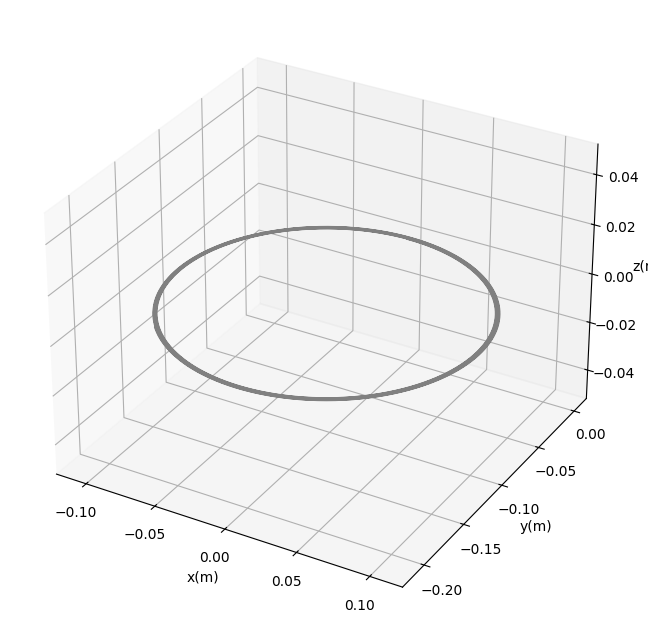

In [6]:
# add code here for 3D plot
ax = plt.axes(projection='3d')
ax.plot3D(rp[:,0], rp[:,1], rp[:,2], 'gray')
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')
#plt.tight_layout
plt.show()
###the loop
#ax = plt.axes(projection='3d')
#ax.plot3D(rp[:,0], rp[:,1],t)
#plt.show()

## Part 2 - Helical Motion

In [7]:
# initial condition
rp[0,:] = np.array([0.0, 0.0, 0.0])
vp[0,:] = np.array([v0, 0.0, v0])
Bvec = [0,0,B0]


# Integration Loop

for i in range(0, len(t)-1):
    Fvec = np.cross(qe * vp[i,:],Bvec)
    dvdt = Fvec / mp
    dxdt = vp[i,:]

    rp[i+1,:] = rp[i,:] + dxdt * dt
    vp[i+1,:] = vp[i,:] + dvdt * dt
    

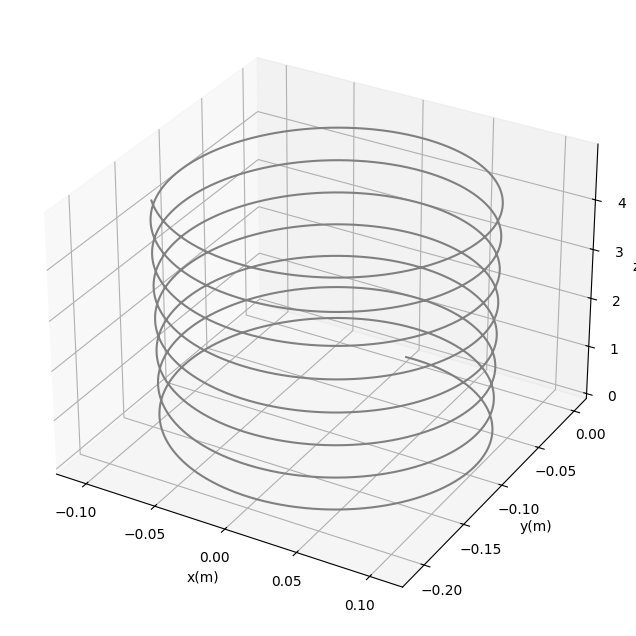

In [8]:
# add code here for 3D plot
ax = plt.axes(projection='3d')
ax.plot3D(rp[:,0], rp[:,1], rp[:,2], 'gray')
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')

plt.show()


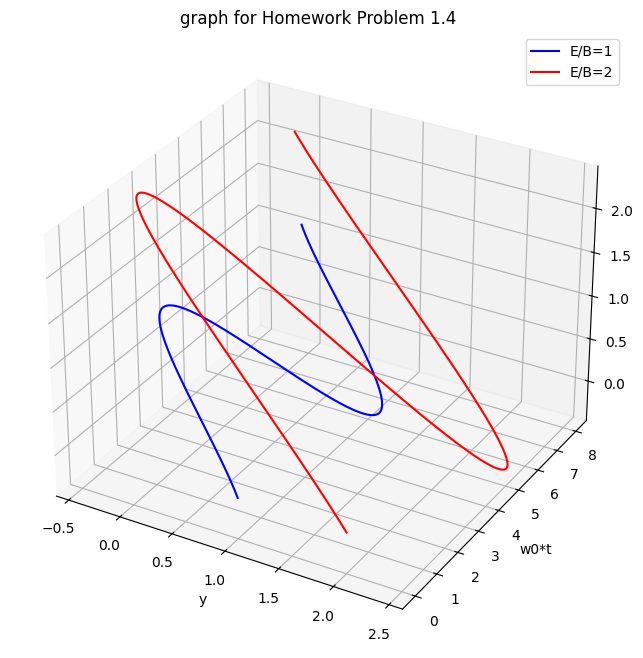

In [45]:
w0 = 1
a = 1 # E/2B
dt = 0.01
t = np.arange(0,8/w0,dt)

y = a/(w0**2) * np.cos(w0*t) - a / (w0) * np.sin(w0*t) + 2*a - a/(w0**2)
z = a/(w0) * np.sin(w0*t) - a / (w0**2) * np.cos(w0*t) + a/(w0)
#x = t*0

ax = plt.axes(projection='3d')

a = 1/2
y1 = a/(w0**2) * np.cos(w0*t) - a / (w0) * np.sin(w0*t) + 2*a - a/(w0**2)
z1 = a/(w0) * np.sin(w0*t) - a / (w0**2) * np.cos(w0*t) + a/(w0)

ax.plot3D(y1,t,z1,color='blue', label = 'E/B=1')
ax.plot3D(y,t,z,color='red', label = 'E/B=2')


ax.set_ylabel('w0*t')
ax.set_xlabel('y')
ax.set_zlabel('z')
#plt.tight_layout
ax.set_title('graph for Homework Problem 1.4')
ax.legend()
plt.show()
